# USE OF ANN FOR CUSTOMER SERVICS FROM BANK DATA




*   Dataset Link: https://archive.ics.uci.edu/dataset/222/bank+marketing



This is done for google collab users while you can done in your own IDE.

In [1]:
#importing notebook from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.listdir('/content/drive/My Drive')

['DriveSharer',
 'Kolop',
 'GDToT',
 'WhatsApp Image 2024-12-20 at 22.40.37_fcdc2f8a.jpg',
 'Colab Notebooks',
 'WhatsApp Image 2025-02-08 at 20.49.09_02e7cb53.jpg',
 'Copy of VC_RedistInstaller.exe',
 'To-do list.gsheet',
 'Google sheets',
 'Untitled spreadsheet.gsheet',
 'changed data type(numeric) (2).xlsx',
 'changed data type(numeric) (1).xlsx',
 'changed data type(numeric).xlsx',
 'changed data type(numeric).gsheet',
 'df_78_data.xlsx',
 'pratice sheet.gsheet',
 'Ask Gemini about the role of pyhton in plant bree... (5).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (4).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (3).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (2).gdoc',
 'Ask Gemini about the role of pyhton in plant bree... (1).gdoc',
 'Ask Gemini about the role of pyhton in plant bree....gdoc',
 'Emails to different stakeholders.gdoc',
 'mmem.jpg',
 'Tableau',
 'Learner-facing C3 Automatidata dataset for Tableau project (2).gshe

In [3]:
dataset_dir = ('/content/drive/My Drive/Dl Models')
os.listdir(dataset_dir)

['bank-full.csv', 'CNN', 'ANN.ipynb']

In [4]:
# Libraries required for data pre-processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [5]:
# Importing dataset
file_path = ('/content/drive/My Drive/Dl Models/bank-full.csv')
df = pd.read_csv(file_path, sep=';')

## This is for IDE users

In [6]:
# Checking fist few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Before Training of model on dataset there are various of problems those need to be checked and solved

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no missing values in dataset

In every dataset there may be many problems those can't easily detected. So differnt methods are used for checking them

## 1. Detecting Outliers & Skewed

### It is necessary to check them as they are extreme values in dataset and model is not robust to them

In [8]:
# Checking Skewed of data
skew_col = df.select_dtypes(include=['int64', 'float64'])
skewed = skew_col.skew()
print('Skewedness of data Before:', skewed)

Skewedness of data Before: age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


this result is not good and they are beyond acceptable range for model


In [9]:
# For detecting outliers IQR method is used
outliers_cols = df.select_dtypes(include=['int64', 'float64']).columns
outliers_info = {}
for col in outliers_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  higher = Q3 + 1.5 * IQR
  outliers = (df[col] < lower) | (df[col] > higher)
  outliers_mask = outliers.sum()
  outliers_info[col] = outliers_mask

print("Outliers Count:")
for col, count in outliers_info.items():
  print(f'{col}: {count}')

Outliers Count:
age: 487
balance: 4729
day: 0
duration: 3235
campaign: 3064
pdays: 8257
previous: 8257


Some columns have outliers as ANN is very senstive to them.

## Solving outliers and skewed
For solution of outliers two methods are going to be used:

* Capping is needed for lower outliers
* Winsorization is needed for higher outliers






### In dataset there is issue as 'pdays' has -ve values. So first, it should be solved and then other issues.

In [10]:
df['pdays'] = df['pdays'].replace(999, -1)
df['was_contacted'] = np.where(df['pdays'] == -1, 0, 1)

print('Unique values of pdays:',df['pdays'].unique())

Unique values of pdays: [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245 204 231 238 258 230 254 265  71 223 246 250 266 240 205 261 259
 241 260 234 251 225 161 237 262 248 255 220 227 206 224 249 235 228 263
   2 270 232 252 207 200 269 233 256 273 272 242 264 208 214 222 271 203
 221 202 216 201 257 229 210 217  75 213  73  76 267 211 215  77 236  82
   6 209 274   1 243 212 275  80 276   9 279  12 280  88 277  85  84 219
  24  21 282  41 294  49 329 307 303 331 308 300  64 314 287 330 332 302
 323 318 333  60 326 335 31

In [11]:
# Applying Capping for lower number of outliers
capping_col = ['age']
for col in capping_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] < lower, lower, df[col])
  df[col] = np.where(df[col] > upper, upper, df[col])
print("Capping Applied on:", capping_col)

Capping Applied on: ['age']


In [12]:
# Applying Winsorization on higher number of outliers
winsor_col = ['balance', 'duration','campaign','previous']
for col in winsor_col:
  df[col] = winsorize(df[col], limits=[0.05, 0.05])

print("Winsorization Applied on:", winsor_col)

Winsorization Applied on: ['balance', 'duration', 'campaign', 'previous']


In [13]:
# Checking Skewed of data
skew1_col = df.select_dtypes(include=['int64', 'float64'])
skewed1 = skew1_col.skew()
print('Skewedness of data After:', skewed1)

Skewedness of data After: age              0.529715
balance          1.784016
day              0.093079
duration         1.295195
campaign         1.546974
pdays            2.615715
previous         2.212583
was_contacted    1.642892
dtype: float64




### In dataset there is problem of rare categories in dataset that causes ANN to overfit as they are in very samall numbers. So this is called Rare Category isssue


In [14]:
# Checking if rare categories are present in dataset
for col in ['job','marital','education','default','housing','loan','contact','month','poutcome']:
  rare = df[col].value_counts(normalize=True) < 0.01
  print(f'{col}, {list(rare[rare].index)}')

job, ['unknown']
marital, []
education, []
default, []
housing, []
loan, []
contact, []
month, ['dec']
poutcome, []


As in result there is issue in two columns job and month. So, this can be solved by merging them

In [15]:
# Merging them into other values
df['job'] = df['job'].replace('unknown', 'Other')
df['month'] = df['month'].replace('dec', 'other')

In [16]:
# Checking if this worked or not
for col in ['job','marital','education','default','housing','loan','contact','month','poutcome']:
    rare = df[col].value_counts(normalize=True) < 0.01
    remaining = list(rare[rare].index)
    print(f'{col}: {remaining if remaining else "No rare categories"}')

job: ['Other']
marital: No rare categories
education: No rare categories
default: No rare categories
housing: No rare categories
loan: No rare categories
contact: No rare categories
month: ['other']
poutcome: No rare categories


The problem is solved as rare catorgries have got enough numbers that these can prevent overfitting.

### Checking correlation for features is also good for model

Correlation can be checked by heatmap

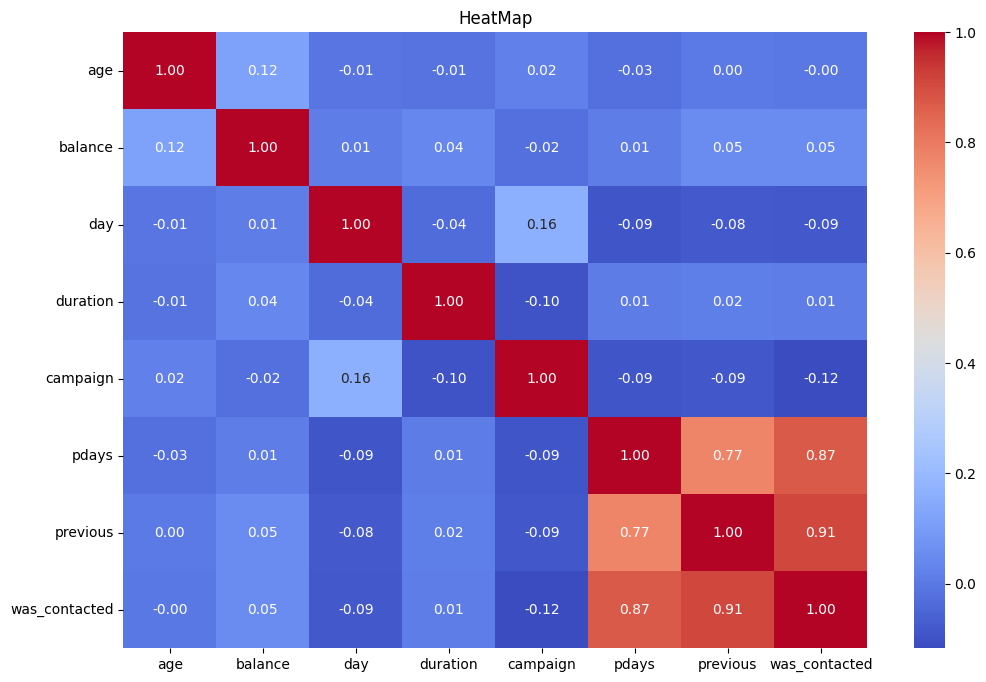

In [17]:
corr_cols = df.select_dtypes(include=['float64', 'int64'])
col_corr = corr_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(col_corr, annot=True, fmt='.2f',cmap='coolwarm')
plt.title("HeatMap")
plt.show();

There is no need for any action here. Everything is fine here.

## In dataset there is timelap values in columns. It must be handled.

To solve this issue cyclic encoding is best apporach for solving them.

In [18]:
# Encycling for months

month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
             'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

df['month_num'] = df['month'].map(month_map)
df['month_sin'] = np.sin(2 * np.pi * df['month_num']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num']/12)
df.drop(['month','month_num'], axis=1, inplace=True)

# Encycling for days
df['day_sin'] = np.sin(2 * np.pi * df['day']/31)
df['day_cos'] = np.cos(2 * np.pi * df['day']/31)

df.drop('day', axis=1, inplace=True)


print(df[['month_sin','month_cos','day_sin','day_cos']].head())


   month_sin  month_cos   day_sin   day_cos
0        0.5  -0.866025  0.848644  0.528964
1        0.5  -0.866025  0.848644  0.528964
2        0.5  -0.866025  0.848644  0.528964
3        0.5  -0.866025  0.848644  0.528964
4        0.5  -0.866025  0.848644  0.528964


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  float64
 1   job            45211 non-null  object 
 2   marital        45211 non-null  object 
 3   education      45211 non-null  object 
 4   default        45211 non-null  object 
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  object 
 7   loan           45211 non-null  object 
 8   contact        45211 non-null  object 
 9   duration       45211 non-null  int64  
 10  campaign       45211 non-null  int64  
 11  pdays          45211 non-null  int64  
 12  previous       45211 non-null  int64  
 13  poutcome       45211 non-null  object 
 14  y              45211 non-null  object 
 15  was_contacted  45211 non-null  int64  
 16  month_sin      44997 non-null  float64
 17  month_cos      44997 non-null  float64
 18  day_si

In [20]:
# There are some missing values those must be solved
df['month_sin'] = df['month_sin'].fillna(0)
df['month_cos'] = df['month_cos'].fillna(0)

print(df[['month_sin','month_cos']].isnull().sum())

month_sin    0
month_cos    0
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  float64
 1   job            45211 non-null  object 
 2   marital        45211 non-null  object 
 3   education      45211 non-null  object 
 4   default        45211 non-null  object 
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  object 
 7   loan           45211 non-null  object 
 8   contact        45211 non-null  object 
 9   duration       45211 non-null  int64  
 10  campaign       45211 non-null  int64  
 11  pdays          45211 non-null  int64  
 12  previous       45211 non-null  int64  
 13  poutcome       45211 non-null  object 
 14  y              45211 non-null  object 
 15  was_contacted  45211 non-null  int64  
 16  month_sin      45211 non-null  float64
 17  month_cos      45211 non-null  float64
 18  day_si

## Encoding Categorical Columns


```
ANN can't accept categorical columns. So, they must be solved
```

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45211 non-null  float64
 1   job            45211 non-null  object 
 2   marital        45211 non-null  object 
 3   education      45211 non-null  object 
 4   default        45211 non-null  object 
 5   balance        45211 non-null  int64  
 6   housing        45211 non-null  object 
 7   loan           45211 non-null  object 
 8   contact        45211 non-null  object 
 9   duration       45211 non-null  int64  
 10  campaign       45211 non-null  int64  
 11  pdays          45211 non-null  int64  
 12  previous       45211 non-null  int64  
 13  poutcome       45211 non-null  object 
 14  y              45211 non-null  object 
 15  was_contacted  45211 non-null  int64  
 16  month_sin      45211 non-null  float64
 17  month_cos      45211 non-null  float64
 18  day_si

In [23]:
# Solving categorical columns
categorical_cols = ['job','marital','education','default','housing','loan','contact','poutcome']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  int64  
 2   duration             45211 non-null  int64  
 3   campaign             45211 non-null  int64  
 4   pdays                45211 non-null  int64  
 5   previous             45211 non-null  int64  
 6   y                    45211 non-null  object 
 7   was_contacted        45211 non-null  int64  
 8   month_sin            45211 non-null  float64
 9   month_cos            45211 non-null  float64
 10  day_sin              45211 non-null  float64
 11  day_cos              45211 non-null  float64
 12  job_admin.           45211 non-null  bool   
 13  job_blue-collar      45211 non-null  bool   
 14  job_entrepreneur     45211 non-null  bool   
 15  job_housemaid        45211 non-null 

In [24]:
target_col = 'y'
df['y'] = df['y'].map({'yes':1, 'no':0})
df['y'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  int64  
 2   duration             45211 non-null  int64  
 3   campaign             45211 non-null  int64  
 4   pdays                45211 non-null  int64  
 5   previous             45211 non-null  int64  
 6   y                    45211 non-null  int64  
 7   was_contacted        45211 non-null  int64  
 8   month_sin            45211 non-null  float64
 9   month_cos            45211 non-null  float64
 10  day_sin              45211 non-null  float64
 11  day_cos              45211 non-null  float64
 12  job_admin.           45211 non-null  bool   
 13  job_blue-collar      45211 non-null  bool   
 14  job_entrepreneur     45211 non-null  bool   
 15  job_housemaid        45211 non-null 

# Training ANN Model

Scaling numeric features is very important for ANN as it is intolerant to them

In [25]:
# libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight



In [26]:
# Scaling numeric feature. Scaling scales all of them on one parameter
# numeric features derived from categorical do not need any scaling
num_columns = ['age', 'balance',
               'campaign', 'pdays', 'previous', 'was_contacted',
               'month_sin', 'month_cos','day_sin', 'day_cos']
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
print("Scaling is applied on Columns")

Scaling is applied on Columns


In [27]:
# Checking scaling applied
df[num_columns].agg(['min', 'max'])

,age,balance,campaign,pdays,previous,was_contacted,month_sin,month_cos,day_sin,day_cos
min,-2.199968,-0.815153,-0.793438,-0.411453,-0.429644,-0.472694,-1.662165,-0.836512,-1.467936,-1.256448
max,2.850644,2.941282,2.881070,8.297431,2.974006,2.115532,1.601946,2.136928,1.390058,1.566532


## After applying all of these steps and clearing dataset And Now training ANN model will begin

For training of model. There is need of one that need to be installed for problem of imbalance of class in dataset. For this addons from tensorflow is recommended.

In [28]:
!pip install git+https://github.com/tensorflow/addons.git


  Cloning https://github.com/tensorflow/addons.git to /tmp/pip-req-build-cosda9tc
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/addons.git /tmp/pip-req-build-cosda9tc
  Resolved https://github.com/tensorflow/addons.git to commit d208d752e98c310280938efa939117bf635a60a8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tensorflow-addons: filename=tensorflow_addons-0.23.0.dev0-cp312-cp312-linux_x86_64.whl size=512725 sha256=5d984d48a3636d6a7f4b5ff6bea2412541cb9292beb77bb7ff2183b10c4cfd5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-bedk7zom/wheels/c2/bd/8a/a635c31aad62c03fa940b8ad0555a23abe899b540bedf9e33d
Successfully built tensorflow-addons
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does 

In [29]:
import tensorflow_addons as tfa
print("TensorFlow Addons version:", tfa.__version__)


TensorFlow Addons version: 0.23.0-dev


/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.19.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're u

In [30]:
#installing packages
!pip install -q keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 3.4 MB/s eta 0:00:00


In [31]:
# Libraries for model training
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras_tuner import RandomSearch
from tensorflow_addons.losses import SigmoidFocalCrossEntropy
from keras.layers import Input
from imblearn.over_sampling import SMOTE



In [32]:
# Spliting dataset for train and test
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (36168, 35)
Test Shape: (9043, 35)


In [33]:
# Applying SMOTE for class imbalance

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_res.shape, y_train_res.shape)


Before SMOTE: (36168, 35) (36168,)
After SMOTE: (63874, 35) (63874,)


In [34]:
# Building Model
def build_model(hp, input_dim):
    model = Sequential()
    unit1 = hp.Int('unit1', min_value=32, max_value=128, step=32)
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(unit1, activation='relu'))

    dropout_rate = hp.Float('dropout', 0.2, 0.5, step=0.1)
    model.add(Dropout(dropout_rate))

    unit2 = hp.Int('unit2', min_value=16, max_value=64, step=16)
    model.add(Dense(unit2, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0001, 0.00001])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model


In [35]:
#Hyperparameter tuning
tuner = RandomSearch(
    lambda hp: build_model(hp, input_dim=X_train_res.shape[1]),
    objective='val_auc',
    max_trials=5,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='binary_ann_final'
)



In [36]:
# Starting hyperparameter tunning
tuner.search(
    X_train_res, y_train_res,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    verbose=1
)


Trial 5 Complete [00h 02m 59s]
val_auc: 0.9000401794910431

Best val_auc So Far: 0.9000401794910431
Total elapsed time: 00h 15m 38s


In [37]:
# Getting model summary
best_model = tuner.get_best_models(num_models=1)[0]
tuner.results_summary()


Results summary
Results in tuner_dir/binary_ann_final
Showing 10 best trials
Objective(name="val_auc", direction="max")

Trial 4 summary
Hyperparameters:
unit1: 64
dropout: 0.4
unit2: 64
learning_rate: 0.001
Score: 0.9000401794910431

Trial 3 summary
Hyperparameters:
unit1: 32
dropout: 0.4
unit2: 48
learning_rate: 0.001
Score: 0.8928655385971069

Trial 1 summary
Hyperparameters:
unit1: 64
dropout: 0.2
unit2: 16
learning_rate: 1e-05
Score: 0.846446692943573

Trial 2 summary
Hyperparameters:
unit1: 32
dropout: 0.4
unit2: 64
learning_rate: 1e-05
Score: 0.82841956615448

Trial 0 summary
Hyperparameters:
unit1: 32
dropout: 0.30000000000000004
unit2: 64
learning_rate: 1e-05
Score: 0.8275623619556427


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [38]:
# Training fully model
history = best_model.fit(
    X_train_res, y_train_res,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=32,
    verbose=1
)


Epoch 1/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8988 - auc: 0.9684 - loss: 0.2262 - val_accuracy: 0.8863 - val_auc: 0.8880 - val_loss: 0.2629
Epoch 2/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9004 - auc: 0.9690 - loss: 0.2245 - val_accuracy: 0.8864 - val_auc: 0.8972 - val_loss: 0.2590
Epoch 3/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8995 - auc: 0.9681 - loss: 0.2271 - val_accuracy: 0.8865 - val_auc: 0.8990 - val_loss: 0.2617
Epoch 4/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9002 - auc: 0.9688 - loss: 0.2253 - val_accuracy: 0.8873 - val_auc: 0.8995 - val_loss: 0.2549
Epoch 5/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9034 - auc: 0.9705 - loss: 0.2188 - val_accuracy: 0.8857 - val_auc: 0.8909 - val_loss: 0.2504
Epoch 6/25
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8995 - auc: 0.9684 - loss: 0.2256 - val_accuracy: 0.8878 - val_auc: 0.8981 - val_loss: 0.2483
Epoch 7/25
1997/1997 ━━━━━━━

## Here model is evaluated

In case of inbalanced dataset first ploting ROC curve is necessary for Model

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
# Evaluate
test_loss, test_acc, test_auc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC : {test_auc:.4f}")

# Getting predicted probablities
y_pred_proba = best_model.predict(X_test).ravel()

# Default Threshould
threshold = 0.5
y_pred = (y_pred_proba>threshold).astype(int)

print(f"Results are default threshold:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred))


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8920 - auc: 0.9054 - loss: 0.2387
Test Accuracy: 0.8878
Test AUC : 0.9076
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Results are default threshold:
              precision    recall  f1-score   support

           0      0.888     0.998     0.940      7985
           1      0.821     0.052     0.098      1058

    accuracy                          0.888      9043
   macro avg      0.855     0.525     0.519      9043
weighted avg      0.880     0.888     0.842      9043

Confusion_matrix:
 [[7973   12]
 [1003   55]]


AUC : 0.9076


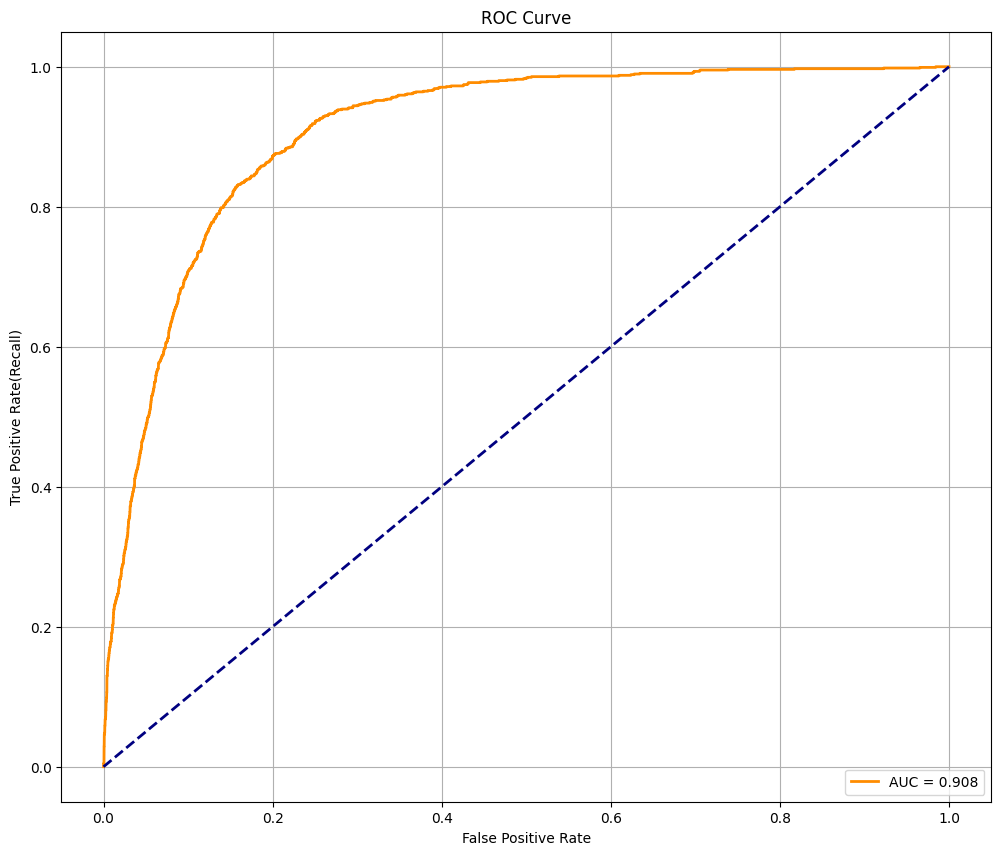

Best Threshold (Youden’s J): 0.143


In [40]:
# Plotiing ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC : {roc_auc:.4f}")

# Plotting Curve
plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(Recall)")
plt.title("ROC Curve")
plt.legend(loc=('lower right'))
plt.grid(True)
plt.show()

# Finding best threshold using Youden's statistic
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print(f"Best Threshold (Youden’s J): {best_thresh:.3f}")

In [41]:
# Re-evaluate Using the Best Threshold
y_pred_best = (y_pred_proba > best_thresh).astype(int)

print(f"\n🔹 Results at Best Threshold = {best_thresh:.3f}")
print(classification_report(y_test, y_pred_best, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


🔹 Results at Best Threshold = 0.143
              precision    recall  f1-score   support

           0      0.980     0.798     0.879      7985
           1      0.364     0.874     0.514      1058

    accuracy                          0.807      9043
   macro avg      0.672     0.836     0.697      9043
weighted avg      0.908     0.807     0.837      9043

Confusion Matrix:
 [[6371 1614]
 [ 133  925]]


PR AUC: 0.5601


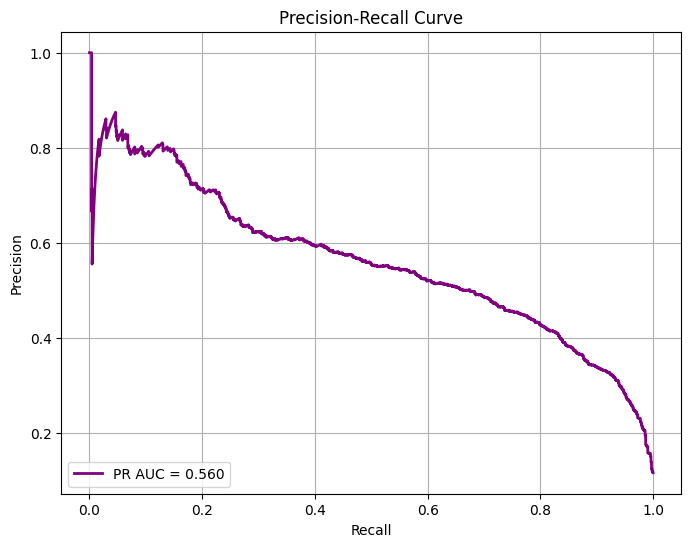

In [42]:
# Ploting precisio-recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = average_precision_score(y_test, y_pred_proba)
print(f"PR AUC: {pr_auc:.4f}")

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [45]:
# Compare Multiple Thresholds for getting best result for dataset
thresholds_to_test = [0.3,0.34, 0.5]

for t in thresholds_to_test:
    print(f"\n🔹 Threshold = {t}")
    y_pred_temp = (y_pred_proba > t).astype(int)
    print(classification_report(y_test, y_pred_temp, digits=3))



🔹 Threshold = 0.3
              precision    recall  f1-score   support

           0      0.922     0.967     0.944      7985
           1      0.605     0.382     0.468      1058

    accuracy                          0.898      9043
   macro avg      0.763     0.674     0.706      9043
weighted avg      0.885     0.898     0.888      9043


🔹 Threshold = 0.34
              precision    recall  f1-score   support

           0      0.906     0.987     0.945      7985
           1      0.706     0.229     0.345      1058

    accuracy                          0.899      9043
   macro avg      0.806     0.608     0.645      9043
weighted avg      0.883     0.899     0.875      9043


🔹 Threshold = 0.5
              precision    recall  f1-score   support

           0      0.888     0.998     0.940      7985
           1      0.821     0.052     0.098      1058

    accuracy                          0.888      9043
   macro avg      0.855     0.525     0.519      9043
weighted avg    

In [46]:
best_model.save("ann_model.h5")
